In [8]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
import seaborn as sns 
import matplotlib.pyplot as plt

In [15]:
cal_data = fetch_california_housing(as_frame=True)
data = cal_data.data
df = data.copy()
df.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22


In [16]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


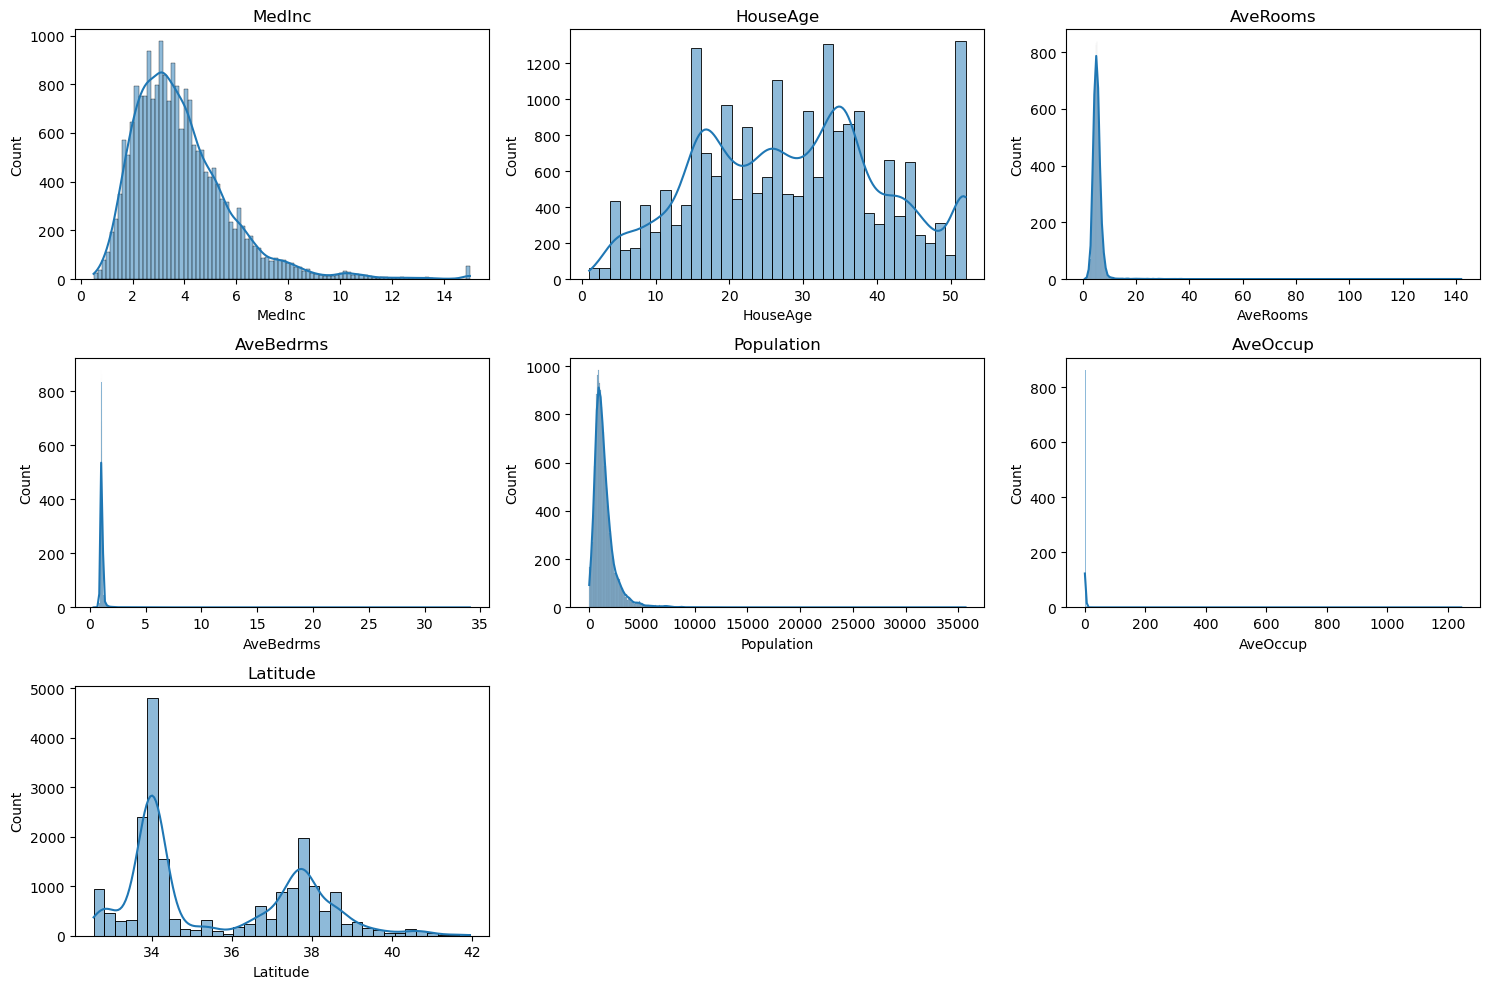

In [17]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

Data is on different scale

- Features are on different scales

- Many are right-skewed

- Not normally distributed

In [24]:
X = df.iloc[:,:]
y = cal_data.target

X.shape, y.shape

((20640, 8), (20640,))

#### Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [28]:
X_train.shape, y_train.shape,  X_test.shape,y_test.shape

((16512, 8), (16512,), (4128, 8), (4128,))

In [37]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [30]:
reg_model = LinearRegression()

In [31]:
reg_model.fit(X_train, y_train)

LinearRegression()

In [33]:
y_train_pred_raw = reg_model.predict(X_train)
y_test_pred_raw = reg_model.predict(X_test)

In [39]:
def evaluate_model(y_true, y_pred, label):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{label} RMSE: {rmse:.4f}")
    print(f"{label} R2  : {r2:.4f}")
    print("-" * 30)

print("WITHOUT PREPROCESSING")
evaluate_model(y_train, y_train_pred_raw, "Train")
evaluate_model(y_test, y_test_pred_raw, "Test")


WITHOUT PREPROCESSING
Train RMSE: 0.7197
Train R2  : 0.6126
------------------------------
Test RMSE: 0.7456
Test R2  : 0.5758
------------------------------


### Apply Standard Scaler 

In [40]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
X_train_scaled_df = pd.DataFrame(
    X_train_scaled, columns=X_train.columns
)


In [45]:
X_train_scaled_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,-0.326196,0.348490,-0.174916,-0.208365,0.768276,0.051376,-1.372811,1.272587
1,-0.035843,1.618118,-0.402835,-0.128530,-0.098901,-0.117362,-0.876696,0.709162
2,0.144701,-1.952710,0.088216,-0.257538,-0.449818,-0.032280,-0.460146,-0.447603
3,-1.017864,0.586545,-0.600015,-0.145156,-0.007434,0.077507,-1.382172,1.232698
4,-0.171488,1.142008,0.349007,0.086624,-0.485877,-0.068832,0.532084,-0.108551


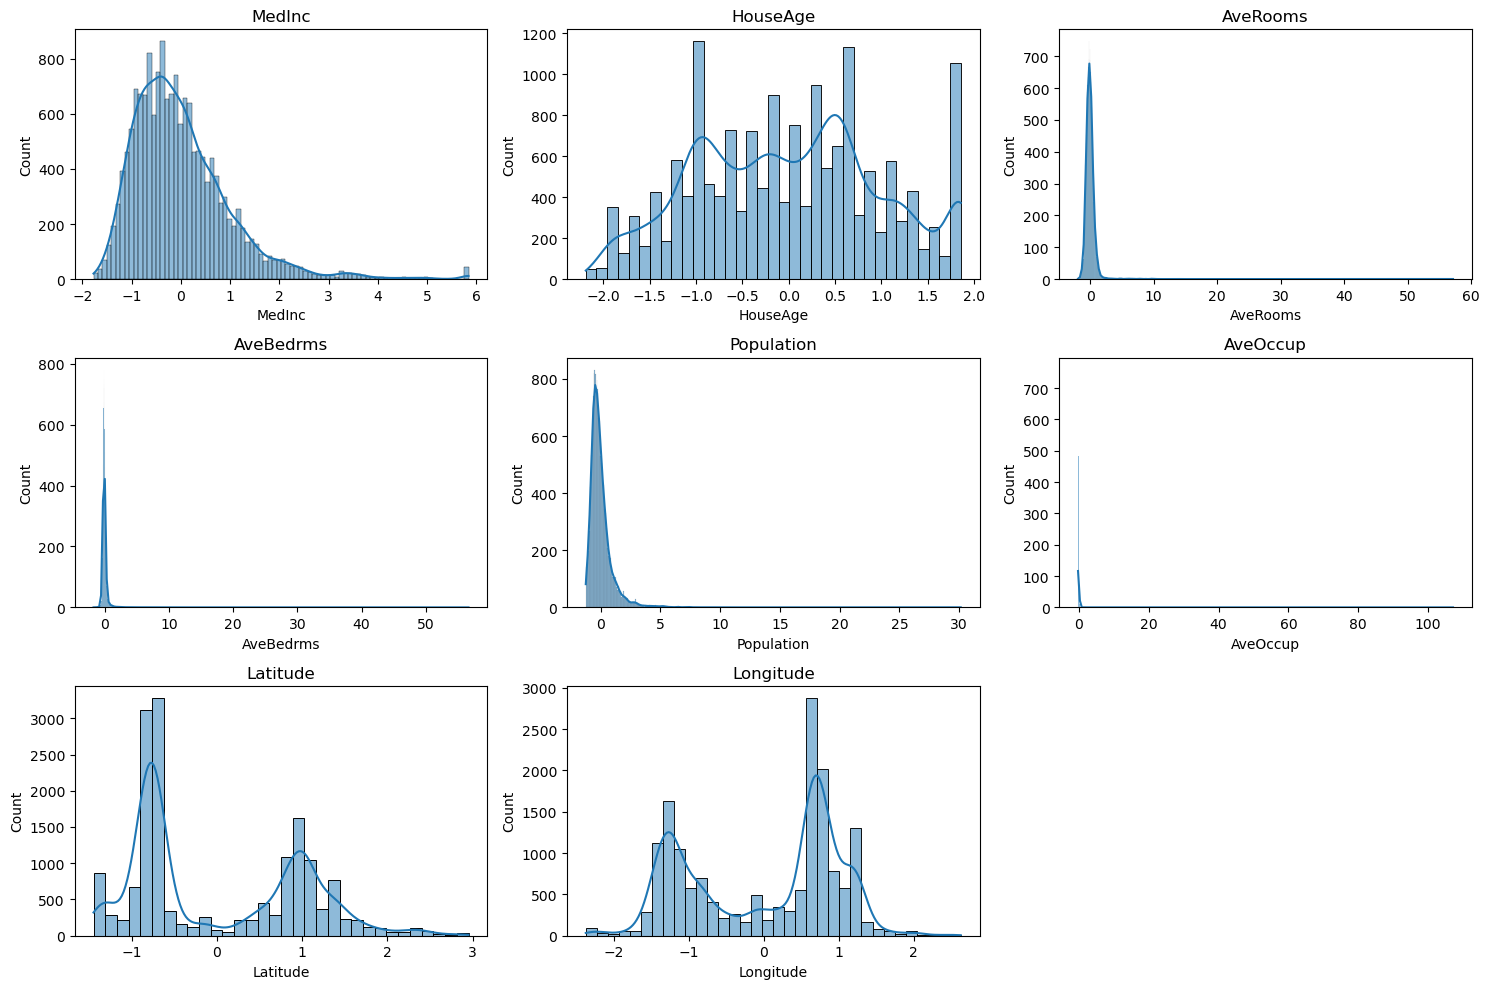

In [44]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(X_train_scaled_df.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(X_train_scaled_df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


All the data points are scaled

- Mean ≈ 0

- Std ≈ 1

- Still not perfectly normal

In [46]:
lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train)

y_train_pred_scaled = lr_scaled.predict(X_train_scaled)
y_test_pred_scaled = lr_scaled.predict(X_test_scaled)

print("AFTER STANDARD SCALING")
evaluate_model(y_train, y_train_pred_scaled, "Train")
evaluate_model(y_test, y_test_pred_scaled, "Test")

AFTER STANDARD SCALING
Train RMSE: 0.7197
Train R2  : 0.6126
------------------------------
Test RMSE: 0.7456
Test R2  : 0.5758
------------------------------


### Apply Power Transformation (To Achieve Normality)

In [49]:
from sklearn.preprocessing import PowerTransformer

In [50]:
power_transformer = PowerTransformer(method="yeo-johnson")

X_train_transformed = power_transformer.fit_transform(X_train_scaled)
X_test_transformed = power_transformer.transform(X_test_scaled)

In [51]:
X_train_transformed_df = pd.DataFrame(
    X_train_transformed, columns=X_train.columns
)


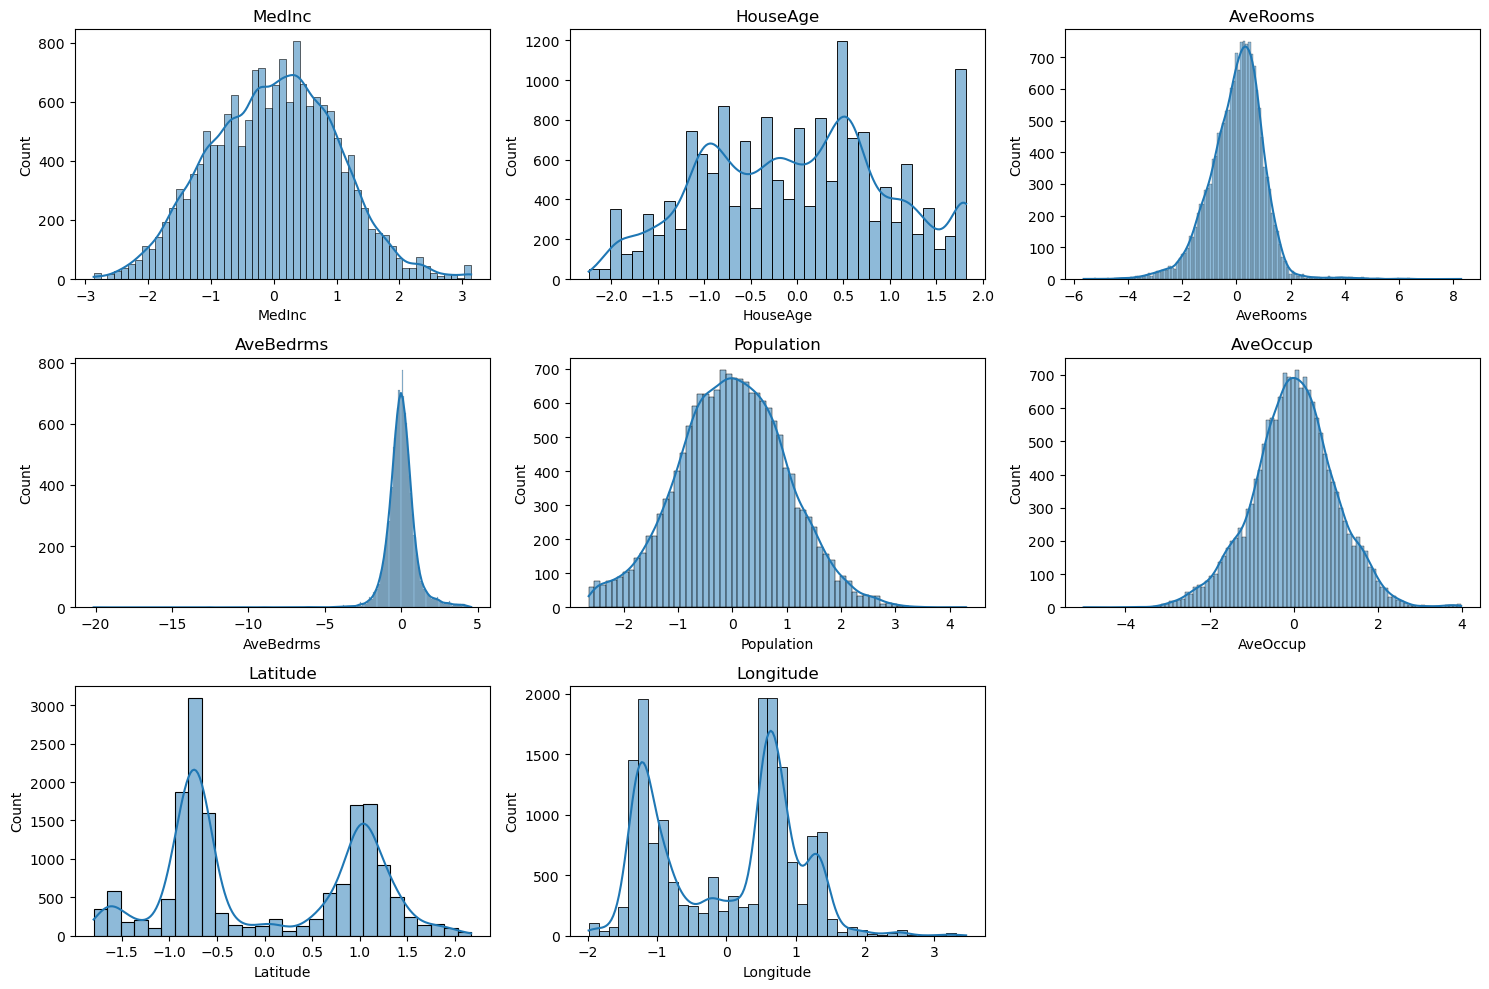

In [52]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(X_train_transformed_df.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(X_train_transformed_df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


In [53]:
lr_transformed = LinearRegression()
lr_transformed.fit(X_train_transformed, y_train)

y_train_pred_trans = lr_transformed.predict(X_train_transformed)
y_test_pred_trans = lr_transformed.predict(X_test_transformed)

print("AFTER SCALING + TRANSFORMATION")
evaluate_model(y_train, y_train_pred_trans, "Train")
evaluate_model(y_test, y_test_pred_trans, "Test")

AFTER SCALING + TRANSFORMATION
Train RMSE: 0.7037
Train R2  : 0.6296
------------------------------
Test RMSE: 0.7136
Test R2  : 0.6114
------------------------------


| Preprocessing Step       | Train RMSE | Train R² | Test RMSE | Test R² |
| ------------------------ | ---------- | -------- | --------- | ------- |
| None                     | 0.7197     | 0.6126   | 0.7456    | 0.5758  |
| Standard Scaling         | 0.7197     | 0.6126   | 0.7456    | 0.5758  |
| Scaling + Transformation | 0.7037     | 0.6296   | 0.7136    | 0.6114  |


In this experiment, I studied the effect of data preprocessing on a Linear Regression model using the California Housing dataset. Without preprocessing, the model achieved moderate performance due to differing feature scales and skewed distributions. Standard scaling alone did not significantly change the results, but combining scaling with a power transformation to reduce skewness improved both train and test performance. This demonstrates that proper preprocessing, especially correcting feature distributions, can enhance model accuracy and generalization.